# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Fourth lesson deals about Molecular Dynamic simulations.
We simulated the dynamic of system of $N$ particles in a box with PBC in NVE ensemble, interacting with a Lennard-Jones potential (classic Lennard-Jones fluid).

The goals of this lesson were:
- improve the MD code provided by enabling the possibility to re-start the simulation reading from two spatial configuration files (*config.0* and *old.0*) and rescaling velocities in order to match a desired temperature.
- implement the calculation of the average values and the uncertainties for energies $E/N$, $U/N$, $K/N$ and temperature $T$ exploiting the blocks method.
- produce pictures of the average values and uncertainties of all the quantities mentioned above in SI units for Argon.

Parameters for conversion in SI units are for Argon:
- $\sigma = 0.34$ nm 
- $\epsilon/k_B = 120$ K
- $m=39.948$ amu


Starting configurations of the simulations are obatained performing one (or more) preliminary simulation(s) to get equilibrium spatial configurations of particles in order to remain in a resonable neighbourhood of the desired temperature during the time of the measure.

From the graph below we can see how the measured temperature get closer to the desired one ($T^\star=0.8$ in this case) each time we restart the simulation. 

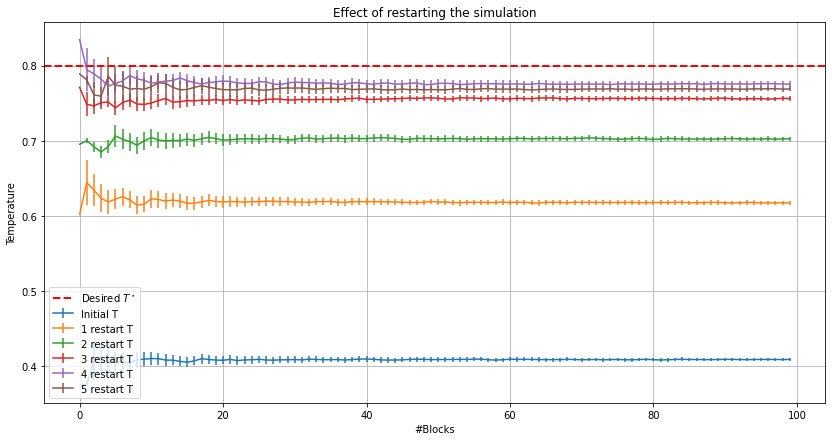

In [40]:
blocks=np.arange(0,100) 
prog_average_t1, prog_average_err_t1  = np.loadtxt("../results/restart_effect/temp1.dat", delimiter = " ", unpack = True)
prog_average_t2, prog_average_err_t2  = np.loadtxt("../results/restart_effect/temp2.dat", delimiter = " ", unpack = True)
prog_average_t3, prog_average_err_t3  = np.loadtxt("../results/restart_effect/temp3.dat", delimiter = " ", unpack = True)
prog_average_t4, prog_average_err_t4  = np.loadtxt("../results/restart_effect/temp4.dat", delimiter = " ", unpack = True)
prog_average_t5, prog_average_err_t5  = np.loadtxt("../results/restart_effect/temp5.dat", delimiter = " ", unpack = True)
prog_average_t6, prog_average_err_t6  = np.loadtxt("../results/restart_effect/temp6.dat", delimiter = " ", unpack = True)

plt.figure(figsize=(14,7))

plt.errorbar(blocks, prog_average_t1, yerr=prog_average_err_t1, label='Initial T')
plt.errorbar(blocks, prog_average_t2, yerr=prog_average_err_t2, label='1 restart T')
plt.errorbar(blocks, prog_average_t3, yerr=prog_average_err_t3, label='2 restart T')
plt.errorbar(blocks, prog_average_t4, yerr=prog_average_err_t4, label='3 restart T')
plt.errorbar(blocks, prog_average_t5, yerr=prog_average_err_t5, label='4 restart T')
plt.errorbar(blocks, prog_average_t6, yerr=prog_average_err_t6, label='5 restart T')
plt.axhline(y=0.8, label='Desired $T^\star$', 
            color='red', linestyle='--',linewidth=2)
plt.title('Effect of restarting the simulation')
plt.xlabel('#Blocks')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)

plt.show()

In [7]:
# SI conversion
k_b=1.380649e-23
a_m_u=1.66054e-27

sigma_ar=0.34e-9
epsilon_ar=120.*k_b
m_ar=39.948*a_m_u

delta=0.0005

time_step_ar=delta*np.sqrt(m_ar*sigma_ar*sigma_ar/epsilon_ar)

### Exercise 04.3

#### Argon solid phase

In [12]:
eqsteps=1000
nblocks=100
nsteps_per_block=100

time_ar=(eqsteps+nblocks*nsteps_per_block)*time_step_ar

print("Argon simulation time: ", time_ar, " s")

Argon simulation time:  1.1832636784047639e-11  s


Simulation of solid phase ($\rho^\star = 1.1$, $T^\star = 0.8$, $r_c = 2.2$) is performed with the following parameters:

- 1000 steps of equilibration
- 100 block
- 100 steps per block
- 108 particles

Given an integration step of $0.0005$ the total simulated time in SI units results $11.8$ ps for Argon
Results are reported below.

(100,)


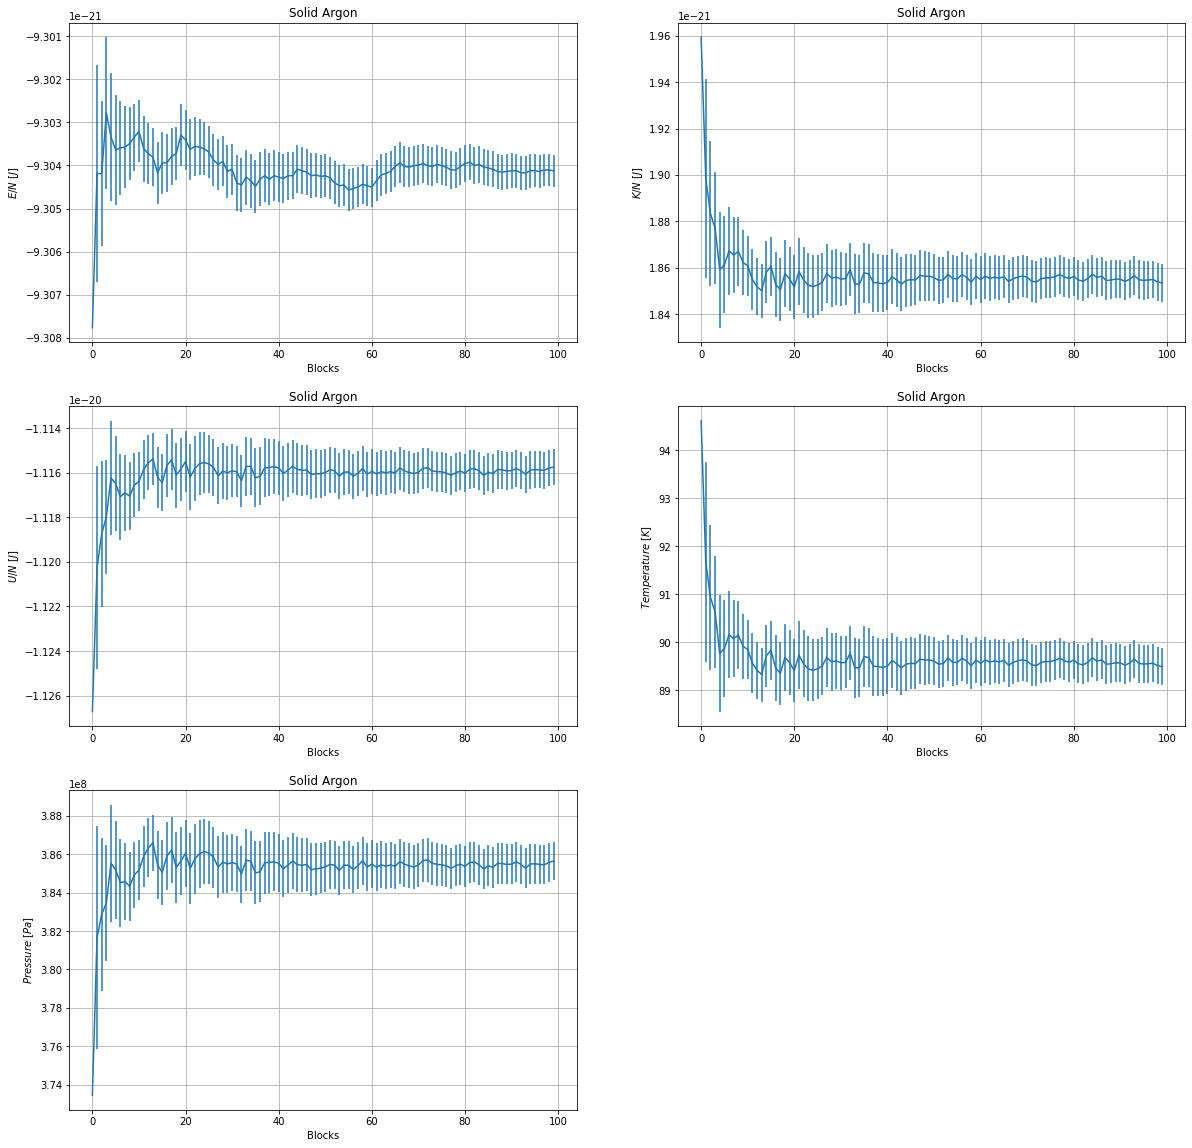

In [12]:
blocks=np.arange(0,100) 
prog_average_e_tot, prog_average_err_e_tot  = np.loadtxt("../results/solid/ave_etot.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_e_pot, prog_average_err_e_pot  = np.loadtxt("../results/solid/ave_epot.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_e_kin, prog_average_err_e_kin  = np.loadtxt("../results/solid/ave_ekin.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_temp, prog_average_err_temp  = np.loadtxt("../results/solid/ave_temp.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_pres, prog_average_err_pres  = np.loadtxt("../results/solid/ave_pres.out", delimiter = "   ", unpack = True, usecols=(1,2))

prog_average_e_tot=prog_average_e_tot*epsilon_ar
prog_average_e_kin=prog_average_e_kin*epsilon_ar
prog_average_e_pot=prog_average_e_pot*epsilon_ar
prog_average_temp=prog_average_temp*epsilon_ar/k_b
prog_average_pres=prog_average_pres*epsilon_ar/(sigma_ar**3)

prog_average_err_e_tot=prog_average_err_e_tot*epsilon_ar
prog_average_err_e_kin=prog_average_err_e_kin*epsilon_ar
prog_average_err_e_pot=prog_average_err_e_pot*epsilon_ar
prog_average_err_temp=prog_average_err_temp*epsilon_ar/k_b
prog_average_err_pres=prog_average_err_pres*epsilon_ar/(sigma_ar**3)

plt.figure(figsize=(20,20))

plt.subplot(321)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$E/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_tot, prog_average_err_e_tot)
plt.grid(True)

plt.subplot(322)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$K/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_kin, prog_average_err_e_kin)
plt.grid(True)

plt.subplot(323)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_pot, prog_average_err_e_pot)
plt.grid(True)

plt.subplot(324)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Temperature$ $[K]$')
plt.errorbar(blocks, prog_average_temp, prog_average_err_temp)
plt.grid(True)

plt.subplot(325)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(blocks, prog_average_pres, prog_average_err_pres)
plt.grid(True)

plt.show()

#### Argon liquid phase

Liquid phase ($\rho^\star = 0.8$, $T^\star = 1.1$, $r_c = 2.5$) simulation is performed with the same parameters written above.
Results are below.

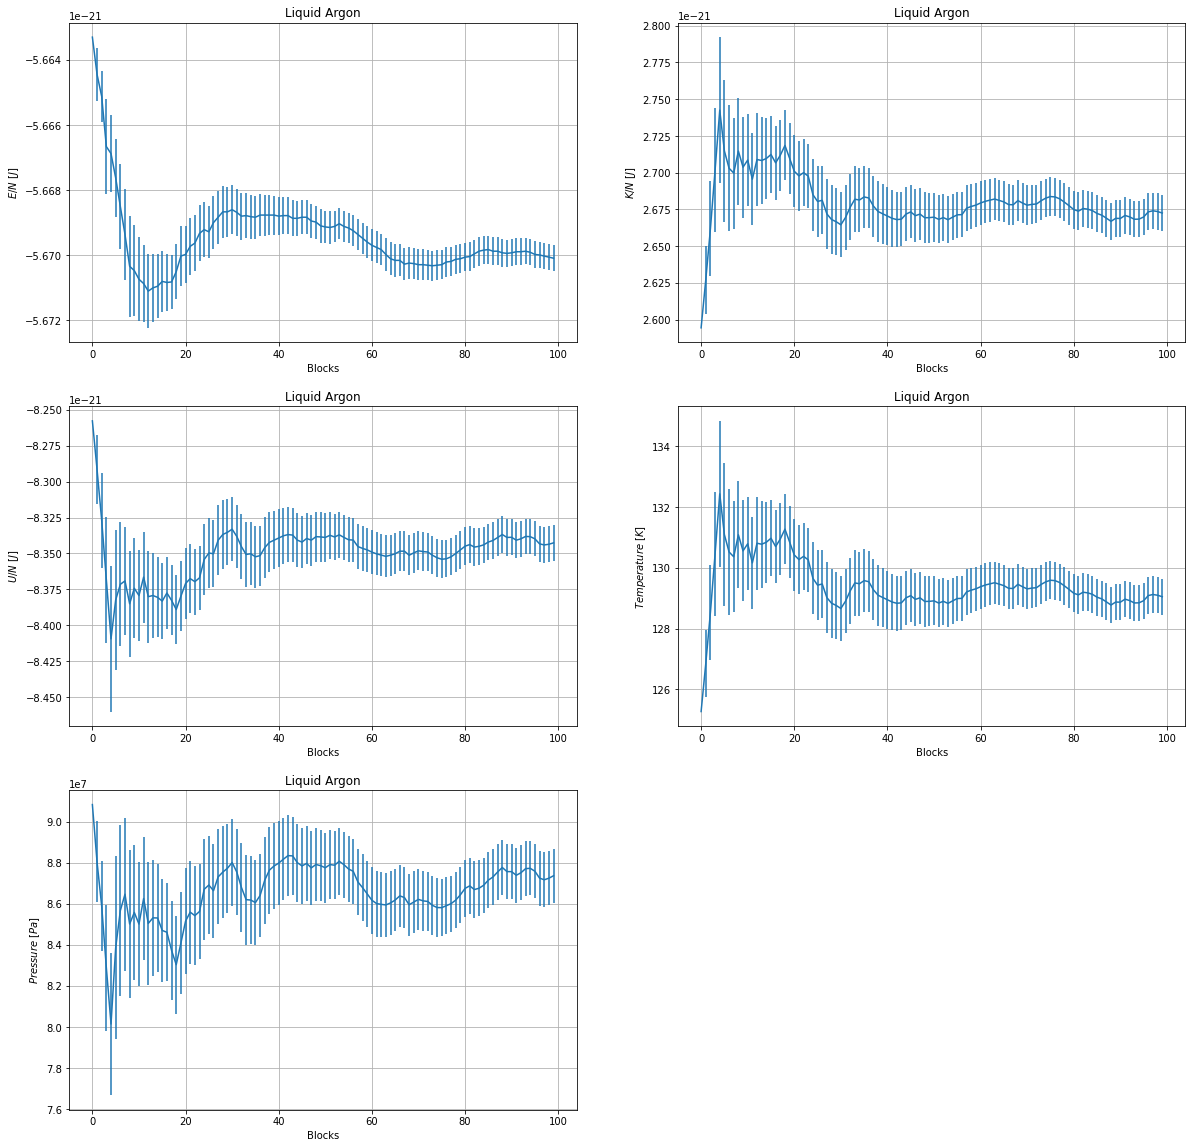

In [14]:
blocks=np.arange(0,100) 
prog_average_e_tot, prog_average_err_e_tot  = np.loadtxt("../results/liquid/ave_etot.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_e_pot, prog_average_err_e_pot  = np.loadtxt("../results/liquid/ave_epot.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_e_kin, prog_average_err_e_kin  = np.loadtxt("../results/liquid/ave_ekin.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_temp, prog_average_err_temp  = np.loadtxt("../results/liquid/ave_temp.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_pres, prog_average_err_pres  = np.loadtxt("../results/liquid/ave_pres.out", delimiter = "   ", unpack = True, usecols=(1,2))

prog_average_e_tot=prog_average_e_tot*epsilon_ar
prog_average_e_kin=prog_average_e_kin*epsilon_ar
prog_average_e_pot=prog_average_e_pot*epsilon_ar
prog_average_temp=prog_average_temp*epsilon_ar/k_b
prog_average_pres=prog_average_pres*epsilon_ar/(sigma_ar**3)

prog_average_err_e_tot=prog_average_err_e_tot*epsilon_ar
prog_average_err_e_kin=prog_average_err_e_kin*epsilon_ar
prog_average_err_e_pot=prog_average_err_e_pot*epsilon_ar
prog_average_err_temp=prog_average_err_temp*epsilon_ar/k_b
prog_average_err_pres=prog_average_err_pres*epsilon_ar/(sigma_ar**3)

plt.figure(figsize=(20,20))

plt.subplot(321)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$E/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_tot, prog_average_err_e_tot)
plt.grid(True)

plt.subplot(322)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$K/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_kin, prog_average_err_e_kin)
plt.grid(True)

plt.subplot(323)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_pot, prog_average_err_e_pot)
plt.grid(True)

plt.subplot(324)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Temperature$ $[K]$')
plt.errorbar(blocks, prog_average_temp, prog_average_err_temp)
plt.grid(True)

plt.subplot(325)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(blocks, prog_average_pres, prog_average_err_pres)
plt.grid(True)

plt.show()

#### Argon gaseous phase

Liquid phase ($\rho^\star = 0.05$, $T^\star = 1.2$, $r_c = 5.0$) simulation is performed with the same parameters written above.
Results are below.

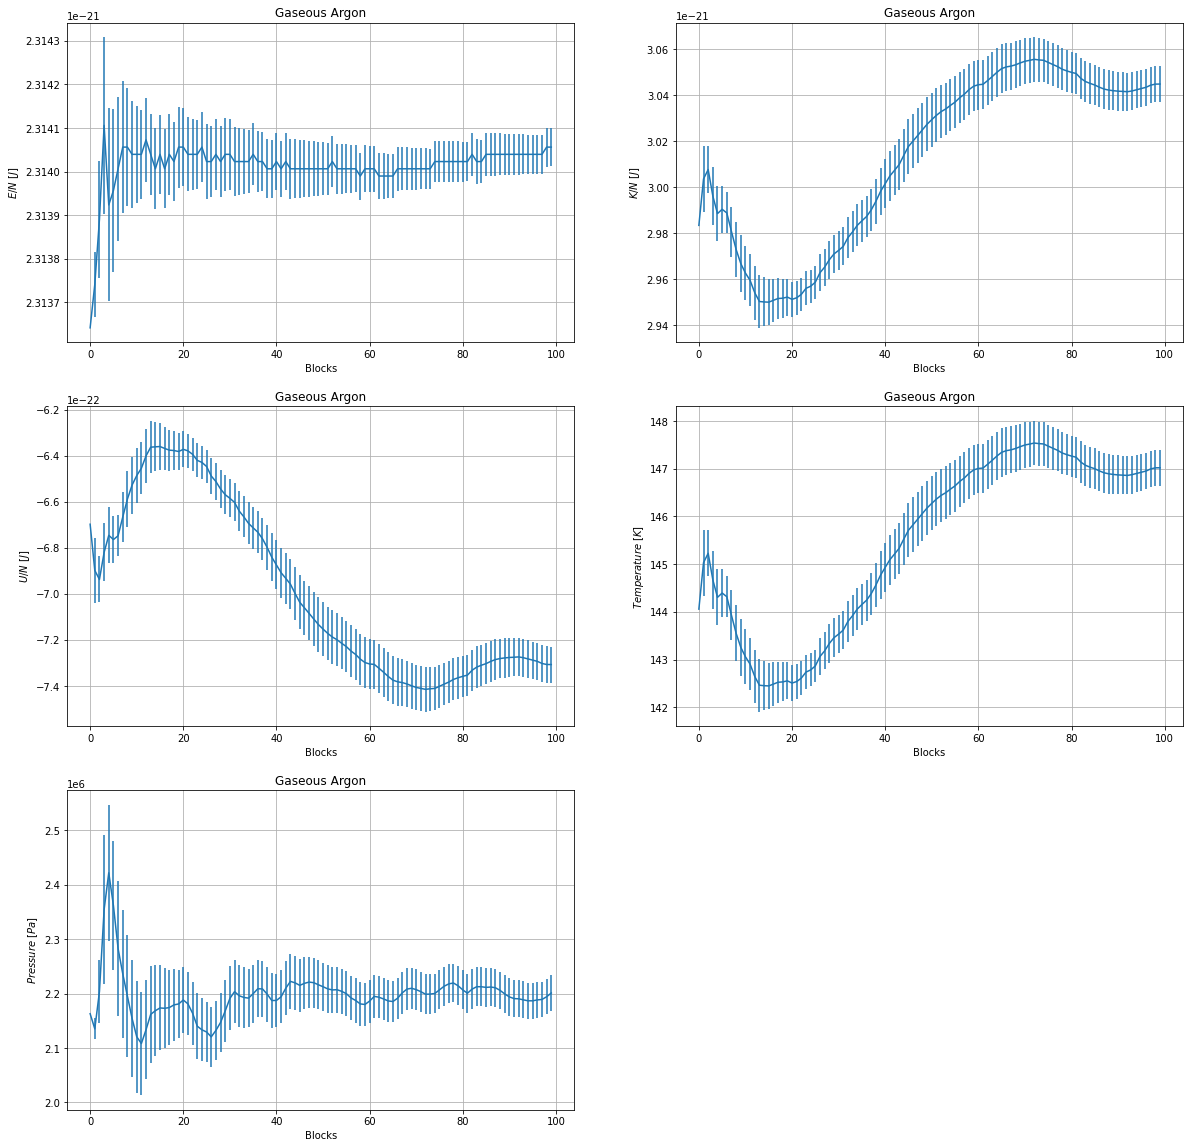

In [16]:
blocks=np.arange(0,100) 
prog_average_e_tot, prog_average_err_e_tot  = np.loadtxt("../results/gas/ave_etot.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_e_pot, prog_average_err_e_pot  = np.loadtxt("../results/gas/ave_epot.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_e_kin, prog_average_err_e_kin  = np.loadtxt("../results/gas/ave_ekin.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_temp, prog_average_err_temp  = np.loadtxt("../results/gas/ave_temp.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_pres, prog_average_err_pres  = np.loadtxt("../results/gas/ave_pres.out", delimiter = "   ", unpack = True, usecols=(1,2))

prog_average_e_tot=prog_average_e_tot*epsilon_ar
prog_average_e_kin=prog_average_e_kin*epsilon_ar
prog_average_e_pot=prog_average_e_pot*epsilon_ar
prog_average_temp=prog_average_temp*epsilon_ar/k_b
prog_average_pres=prog_average_pres*epsilon_ar/(sigma_ar**3)

prog_average_err_e_tot=prog_average_err_e_tot*epsilon_ar
prog_average_err_e_kin=prog_average_err_e_kin*epsilon_ar
prog_average_err_e_pot=prog_average_err_e_pot*epsilon_ar
prog_average_err_temp=prog_average_err_temp*epsilon_ar/k_b
prog_average_err_pres=prog_average_err_pres*epsilon_ar/(sigma_ar**3)

plt.figure(figsize=(20,20))

plt.subplot(321)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$E/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_tot, prog_average_err_e_tot)
plt.grid(True)

plt.subplot(322)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$K/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_kin, prog_average_err_e_kin)
plt.grid(True)

plt.subplot(323)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_pot, prog_average_err_e_pot)
plt.grid(True)

plt.subplot(324)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$Temperature$ $[K]$')
plt.errorbar(blocks, prog_average_temp, prog_average_err_temp)
plt.grid(True)

plt.subplot(325)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(blocks, prog_average_pres, prog_average_err_pres)
plt.grid(True)

plt.show()

Watching at the total energy $E/N$ only one could be tempted to affirm that it is not conserved. Anyway, plotting it together with the kinetic and potential energy, is clear that the fluctuation that we observe are on a small scale and we can safely affirm that the total energy is indeed conserved: 

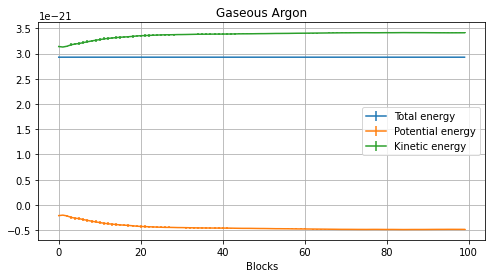

In [42]:
plt.figure(figsize=(8,4))

plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.errorbar(blocks, prog_average_e_tot, prog_average_err_e_tot, label='Total energy')
plt.errorbar(blocks, prog_average_e_pot, prog_average_err_e_pot, label='Potential energy')
plt.errorbar(blocks, prog_average_e_kin, prog_average_err_e_kin, label='Kinetic energy')
plt.legend()
plt.grid(True)

plt.show()